<a href="https://colab.research.google.com/github/dxbee/ml-projects/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

# List the files in the downloaded dataset directory
print(os.listdir(path))

csv_file = os.path.join(path, "Housing.csv")

100%|██████████| 4.63k/4.63k [00:00<00:00, 7.74MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
['Housing.csv']


In [2]:
# Read the dataset into a pandas DataFrame
house = pd.read_csv(csv_file)
house.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
house.info()
house.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

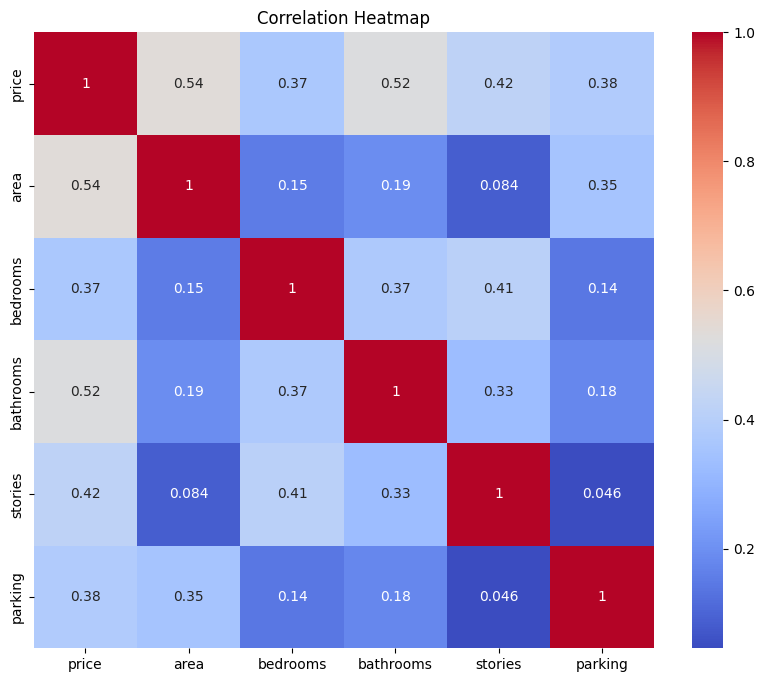

In [5]:
# Select only numeric columns
numeric_cols = house.select_dtypes(include=['number'])

# Compute correlation matrix
correlation = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


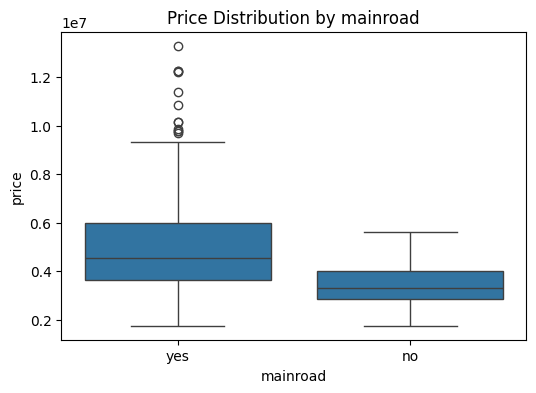

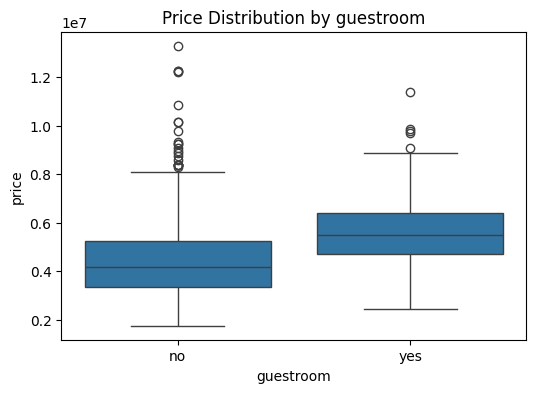

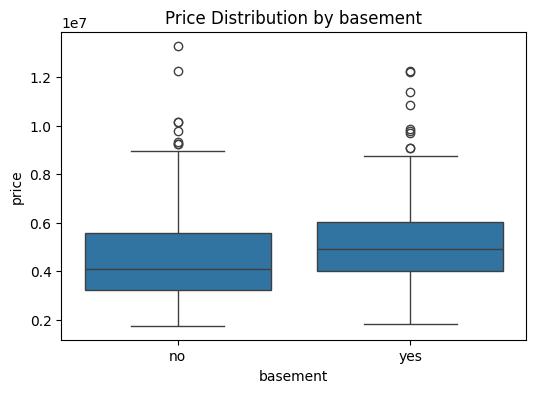

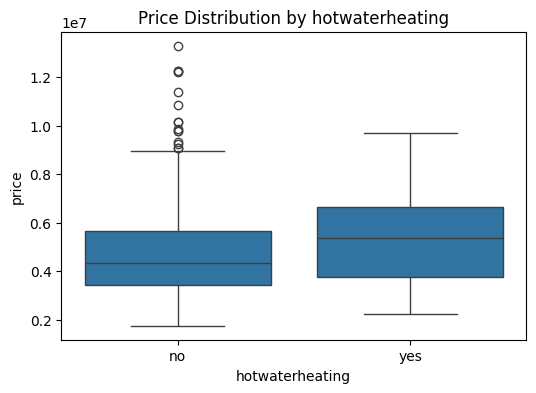

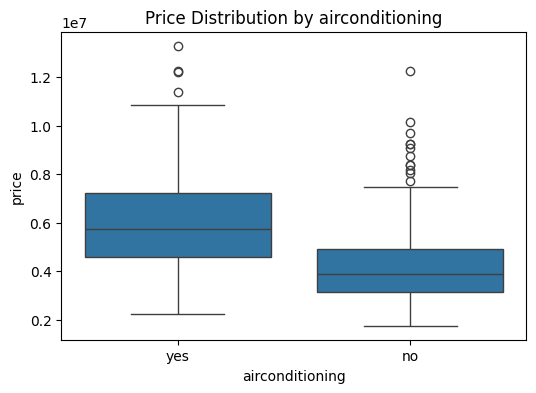

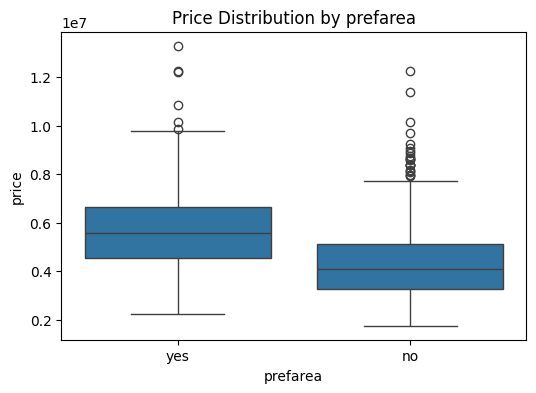

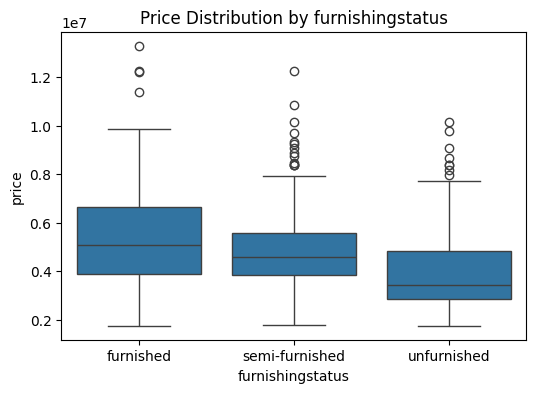

In [6]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='price', data=house)
    plt.title(f"Price Distribution by {col}")
    plt.show()


<ipython-input-7-cb220219ca3b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=house, estimator='mean', ci=None)


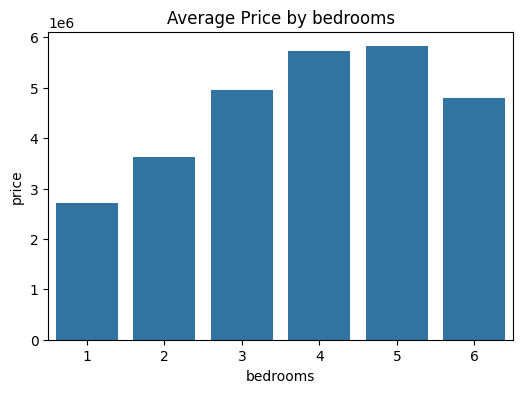

<ipython-input-7-cb220219ca3b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=house, estimator='mean', ci=None)


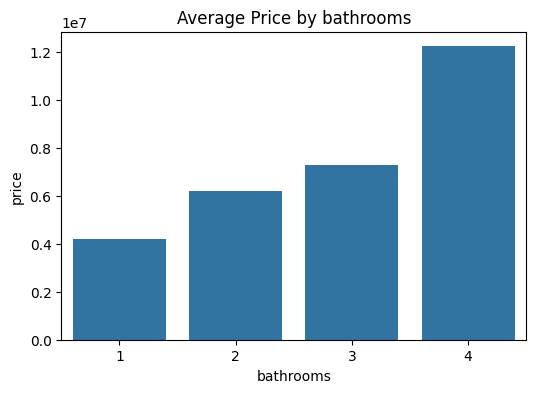

<ipython-input-7-cb220219ca3b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=house, estimator='mean', ci=None)


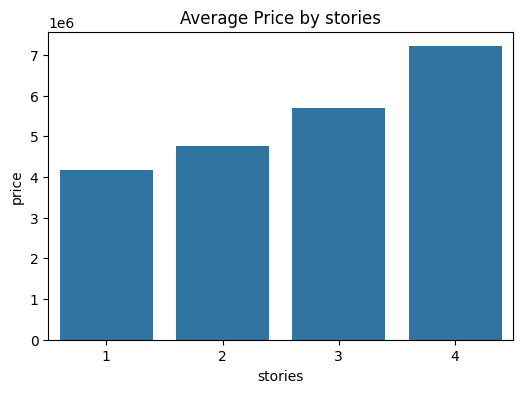

<ipython-input-7-cb220219ca3b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=house, estimator='mean', ci=None)


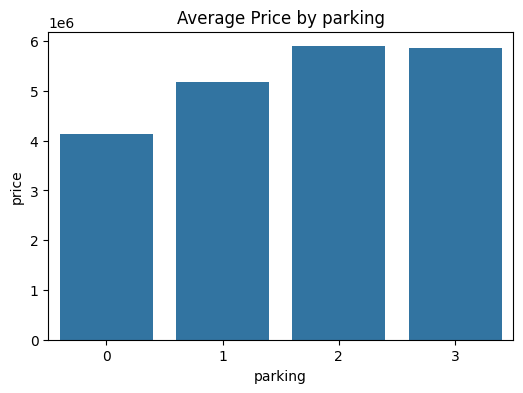

In [7]:
discrete_cols = ['bedrooms', 'bathrooms', 'stories', 'parking']

for col in discrete_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='price', data=house, estimator='mean', ci=None)
    plt.title(f"Average Price by {col}")
    plt.show()


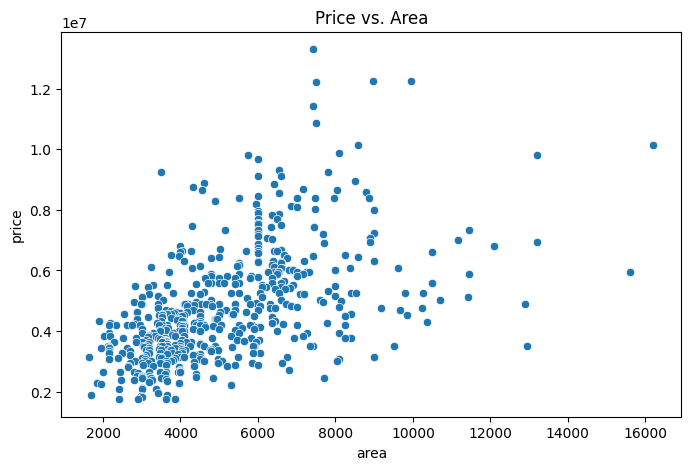

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=house)
plt.title("Price vs. Area")
plt.show()


In [9]:
# Ensure boolean values are converted to strings
house[['mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus']] = house[['mainroad', 'guestroom',
                                                 'basement', 'hotwaterheating',
                                                 'airconditioning', 'prefarea',
                                                 'furnishingstatus']].astype(str)

# One-Hot Encode the categorical features keeping all categories and ensuring binary 0/1 format
ohe = pd.get_dummies(house[['mainroad', 'guestroom', 'basement',
                            'hotwaterheating', 'airconditioning',
                            'prefarea', 'furnishingstatus']],
                     drop_first=False,
                     dtype=int)

# Drop the original categorical columns
house.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)

# Concatenate the encoded columns back to the dataframe
house_df = pd.concat([house, ohe], axis=1)

# View the updated dataframe
house_df.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [10]:
house_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [11]:
# Define features and target variable
X = house_df.drop(columns=['price'])
y = house_df['price']

X.shape, y.shape

((545, 20), (545,))

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features, scaling is important for algorithms like SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Linear Regression Model Performance:
MSE: 1754318687330.669
R² Score: 0.6529242642153175


In [15]:
# Validate the model by performing cross-validation
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=10, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.60118191 0.69976075 0.6821068  0.63722289 0.53264206 0.67115833
 0.65975462 0.57434967 0.7315954  0.46197963]
Mean R² Score: 0.6251752054414532


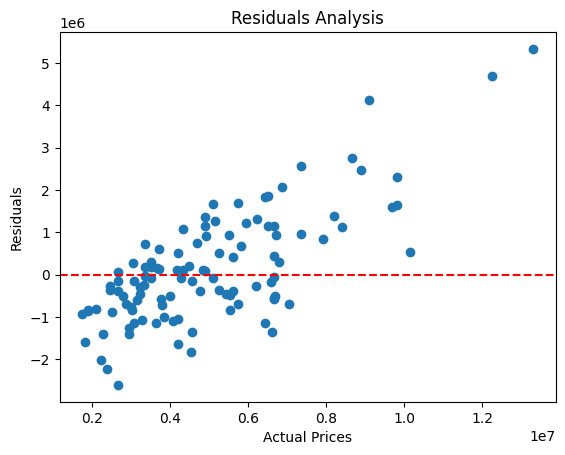

In [16]:
# Residual Analysis
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals Analysis")
plt.show()


In [17]:
# Interpret the coefficients
# Positive coefficients: As the feature increases, the target variable increases.
# Negative coefficients: As the feature increases, the target variable decreases.

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
print(coefficients)


                            Feature    Coefficient
0                              area  519552.416340
1                          bedrooms   57349.559419
2                         bathrooms  521879.027748
3                           stories  349251.438906
4                           parking  192005.953667
5                       mainroad_no  -64249.314107
6                      mainroad_yes   64249.314107
7                      guestroom_no  -44384.333843
8                     guestroom_yes   44384.333843
9                       basement_no  -93533.901607
10                     basement_yes   93533.901607
11               hotwaterheating_no  -74931.351495
12              hotwaterheating_yes   74931.351495
13               airconditioning_no -182578.696925
14              airconditioning_yes  182578.696925
15                      prefarea_no -133328.175997
16                     prefarea_yes  133328.175997
17       furnishingstatus_furnished   80529.382918
18  furnishingstatus_semi-furni

In [18]:
# Save the trained model for future use
joblib.dump(linear_model, "linear_regression_model.pkl")

# Save the scaler to apply on new data
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']